In [59]:
from __future__ import print_function
import h5py
import numpy as np
import os
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import scipy.stats

In [8]:
data_dir = '/baldig/physicsprojects/nova/data/lars/'

In [60]:
def get_input_spectrum(filename, num_samples):
    with h5py.File(filename) as f:
        top_energies = []
        for fr, to in zip(range(0, num_samples, 10), range(10, num_samples+10, 10)):
            top = f['data'][fr:to, 0, :, :]
            top_energies.append(top[np.nonzero(top)])
        top_energies = np.concatenate(top_energies)

        side_energies = []
        for fr, to in zip(range(0, num_samples, 10), range(10, num_samples+10, 10)):
            side = f['data'][fr:to, 1, :, :]
            side_energies.append(side[np.nonzero(side)])
        side_energies = np.concatenate(side_energies)

        top_mode = scipy.stats.mode(top_energies/100)
        side_mode = scipy.stats.mode(side_energies/100)
        print(top_mode, side_mode)
    return top_energies, side_energies

def plot_input_spectrum(axes, energies, labelsize=15):
    colors = ['b', 'r', 'g']
    for i, e in enumerate(energies):
        axes.hist(e, bins=200, normed=1, range=(0,0.1), histtype='step', color=colors[i])
    if len(energies) > 1:
        axes.legend(handles=[mpatches.Patch(color='b', label='Top-view'),
                             mpatches.Patch(color='r', label='Side-view')],
                    prop={'size': 18})
    axes.set_xlabel('Energy (GeV)', fontsize=labelsize)
    axes.set_ylabel('Density', fontsize=labelsize)

In [67]:
filename = os.path.join(data_dir, 'electron_event_energy/electron_event_images_0_1800.h5')
top, side = get_input_spectrum(filename=filename, num_samples=10000)

ModeResult(mode=array([ 0.0019972], dtype=float32), count=array([39])) ModeResult(mode=array([ 0.00185705], dtype=float32), count=array([24]))


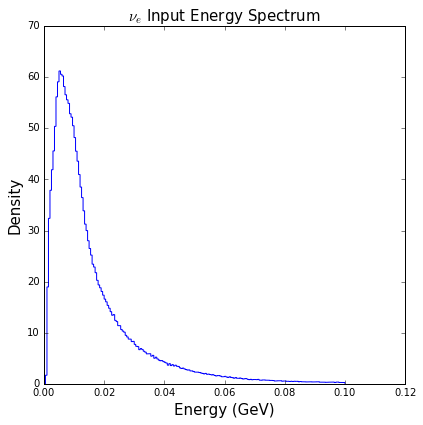

In [68]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
# plot_input_spectrum(axes=axes, energies=[top/100., side/100.])
plot_input_spectrum(axes=axes, energies=[np.concatenate([top, side])/100.])
axes.set_title(r'$\nu_e$ Input Energy Spectrum', fontsize=labelsize)
fig.tight_layout()
fig.savefig('figures/nue_input_spectrum.pdf')

In [73]:
filename = os.path.join(data_dir, 'electron_prong_energy/electron_prong_images_0_1800.h5')
top, side = get_input_spectrum(filename=filename, num_samples=10000)

ModeResult(mode=array([ 0.00182201], dtype=float32), count=array([26])) ModeResult(mode=array([ 0.00238263], dtype=float32), count=array([22]))


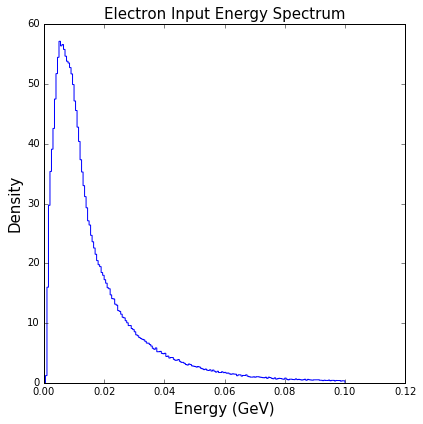

In [75]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
# plot_input_spectrum(axes=axes, energies=[top/100., side/100.])
plot_input_spectrum(axes=axes, energies=[np.concatenate([top, side])/100.])
axes.set_title(r'Electron Input Energy Spectrum', fontsize=labelsize)
fig.tight_layout()
fig.savefig('figures/electron_input_spectrum.pdf')